In [2]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("C:/Users/HP/Downloads/t20I_cricket_dataset_new.csv")
df.head()

,Unnamed: 0,powerPlay,AverageScore,battingTeam,bowlingTeam,city,delivery_left,score,CurrentRunRate,wicketsLeft,Run_In_Last5,Wickets_In_Last5,Final_Score,innings
0,10400,0.0,138.162791,New Zealand,Pakistan,Dubai,63,56,5.894737,8,24.0,2.0,144,1.0
1,163545,0.0,103.000000,Zimbabwe,Sri Lanka,Hambantota,40,76,5.700000,5,30.0,2.0,100,2.0
2,1557,0.0,154.000000,West Indies,Australia,St Lucia,53,68,6.089552,5,27.0,3.0,105,1.0
3,94589,0.0,146.285714,Australia,India,Bengaluru,18,159,9.352941,7,50.0,0.0,194,2.0
4,119086,0.0,135.609756,Sri Lanka,South Africa,Colombo,42,82,6.307692,7,38.0,1.0,135,2.0


In [4]:
df.dtypes

Unnamed: 0            int64
powerPlay           float64
AverageScore        float64
battingTeam          object
bowlingTeam          object
city                 object
delivery_left         int64
score                 int64
CurrentRunRate      float64
wicketsLeft           int64
Run_In_Last5        float64
Wickets_In_Last5    float64
Final_Score           int64
innings             float64
dtype: object

In [5]:
df.isna().sum()

Unnamed: 0             0
powerPlay            440
AverageScore           0
battingTeam            0
bowlingTeam            0
city                   0
delivery_left          0
score                  0
CurrentRunRate         0
wicketsLeft            0
Run_In_Last5        4176
Wickets_In_Last5    7976
Final_Score            0
innings             1302
dtype: int64

In [6]:
obj=[i for i in df.columns if df[i].dtype==object]
obj

['battingTeam', 'bowlingTeam', 'city']

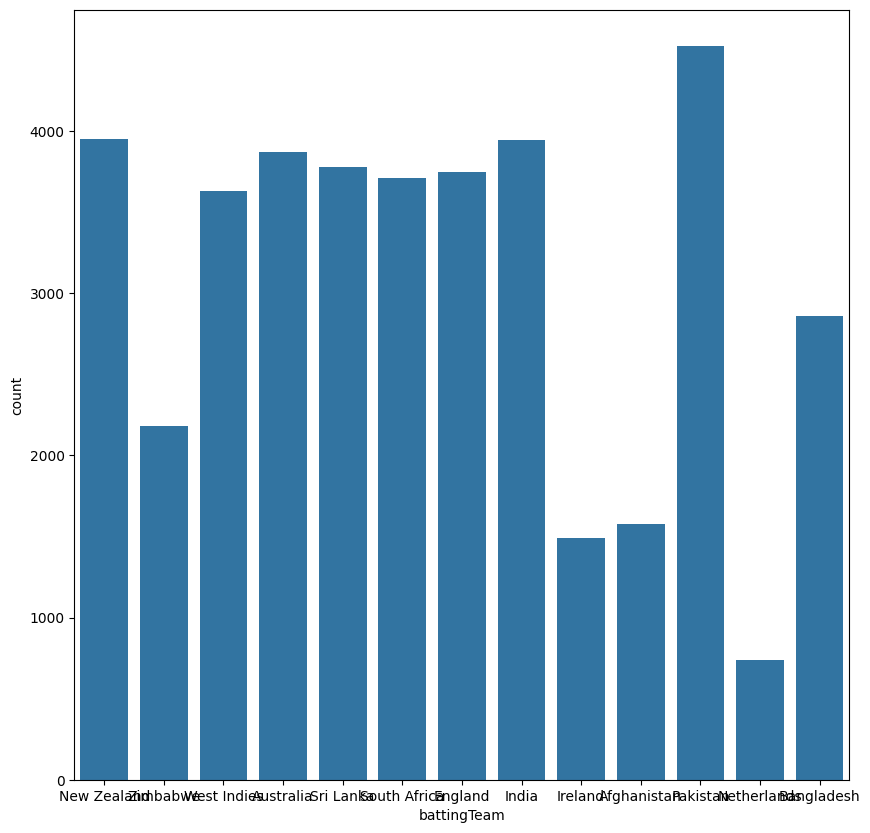

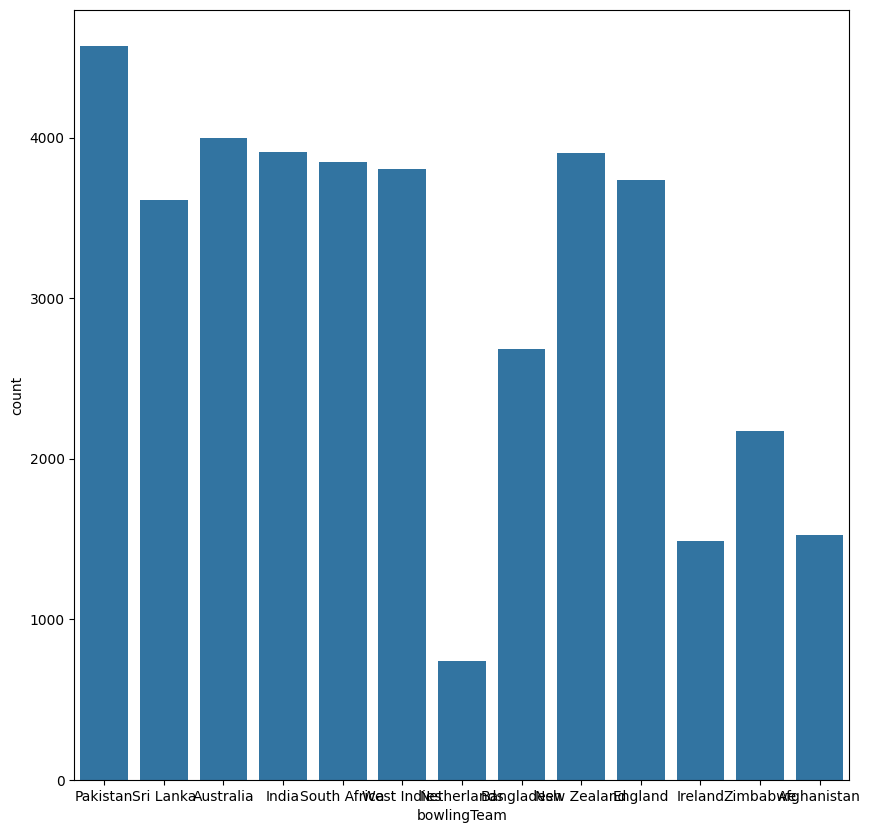

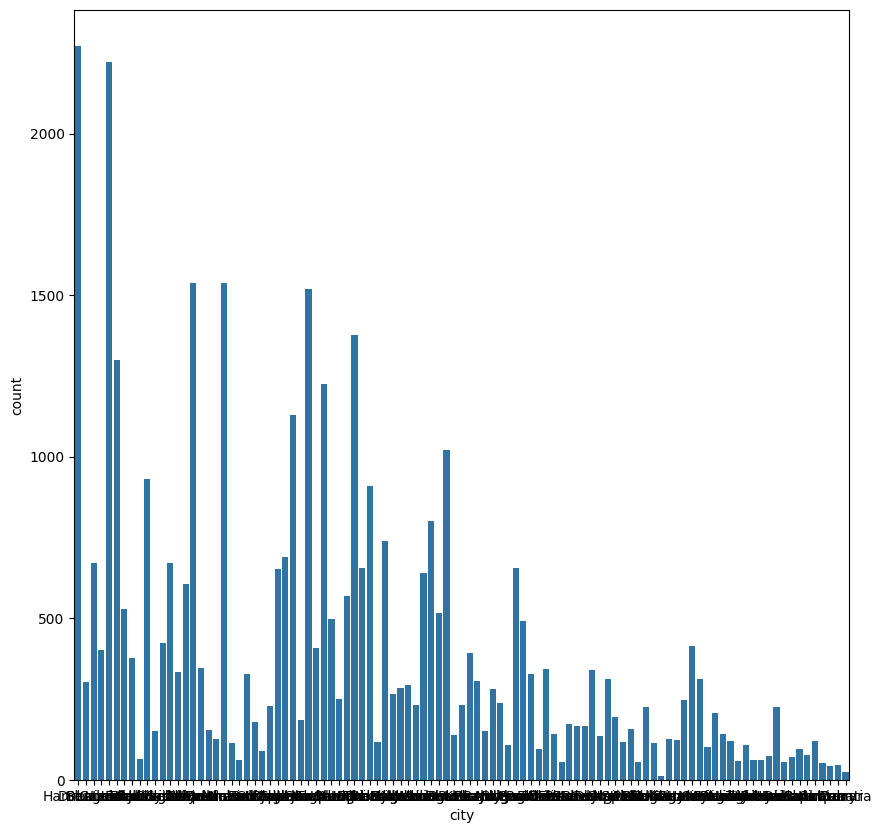

In [7]:
for i in obj:
    plt.figure(figsize=(10,10))
    sns.countplot(x=df[i],data=df)
    plt.show()

In [8]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [9]:
num=[i for i in df.columns if i not in obj and i!='Final_Score']
num

['powerPlay',
 'AverageScore',
 'delivery_left',
 'score',
 'CurrentRunRate',
 'wicketsLeft',
 'Run_In_Last5',
 'Wickets_In_Last5',
 'innings']

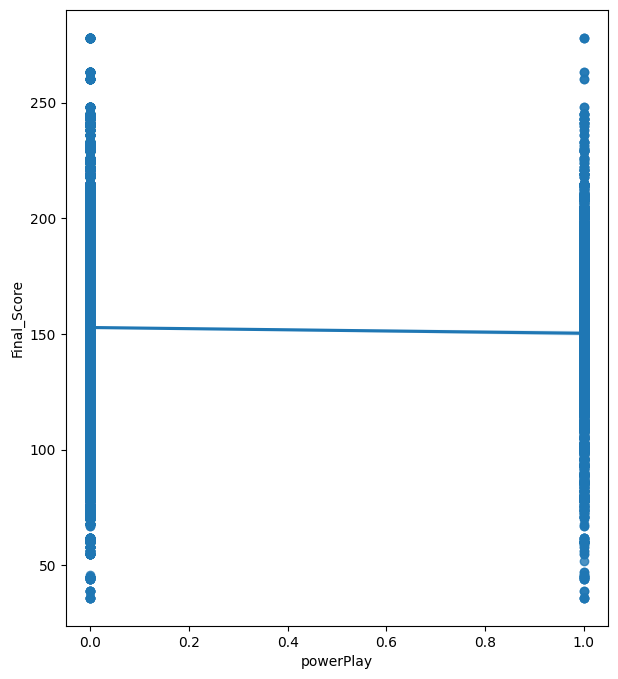

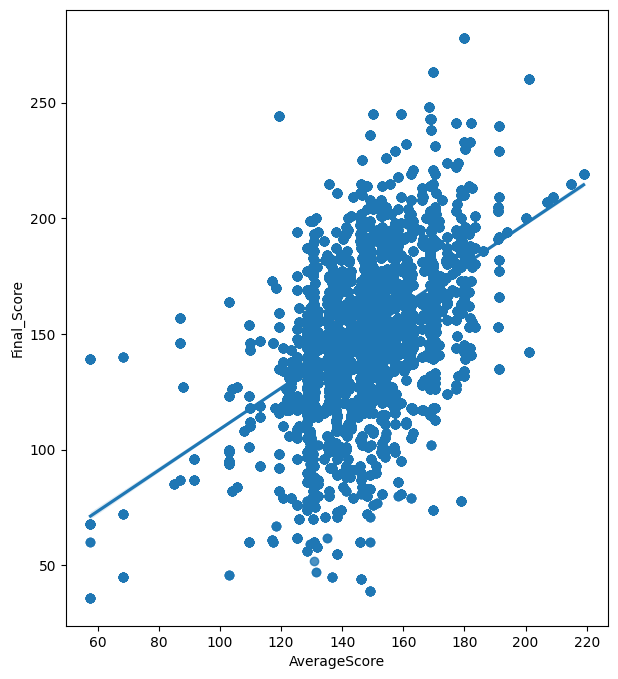

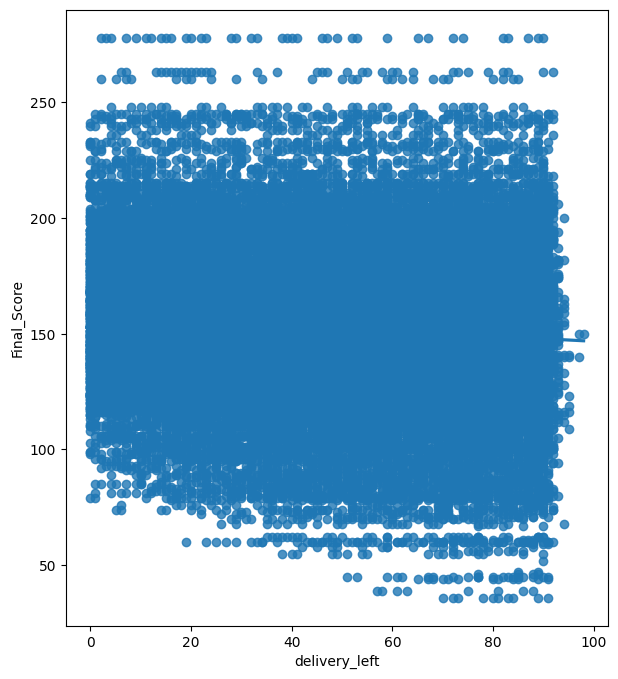

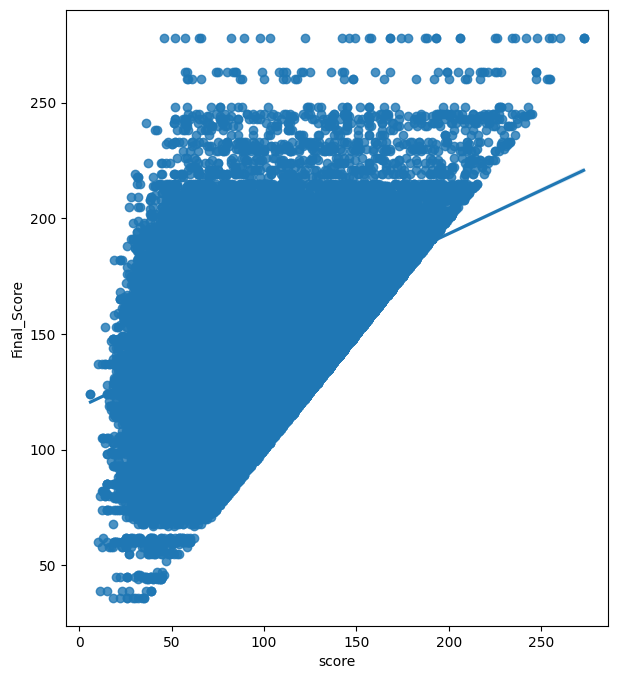

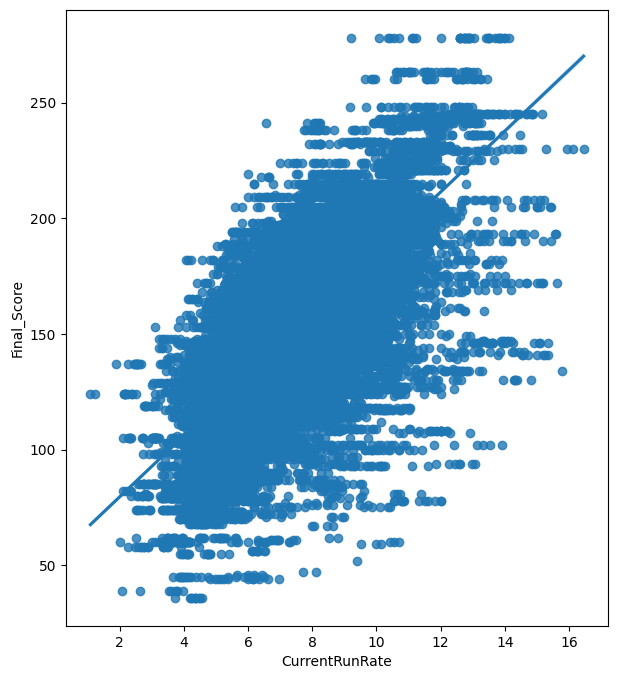

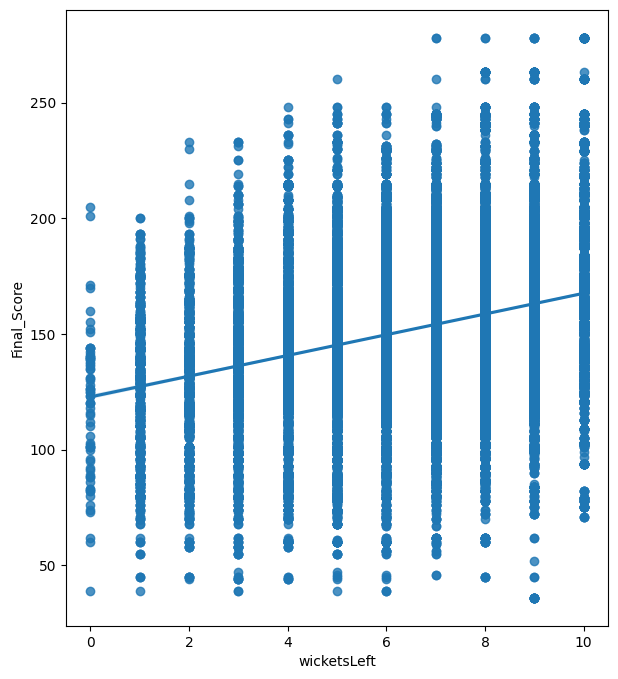

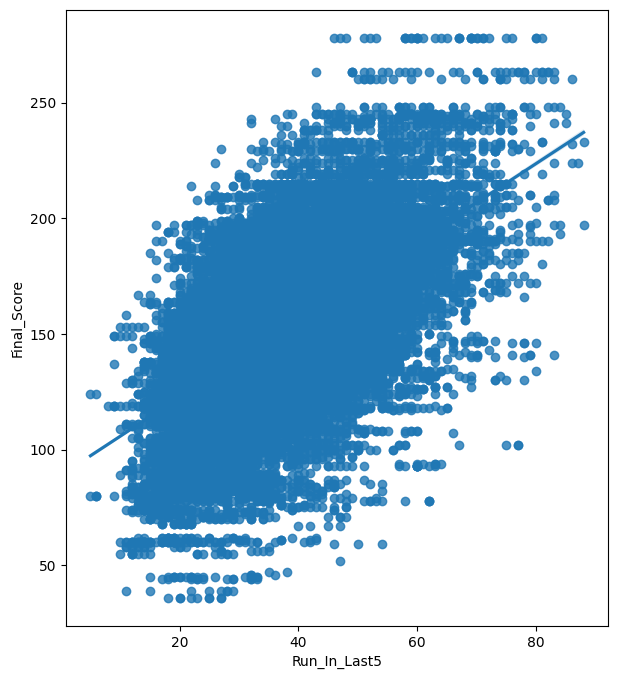

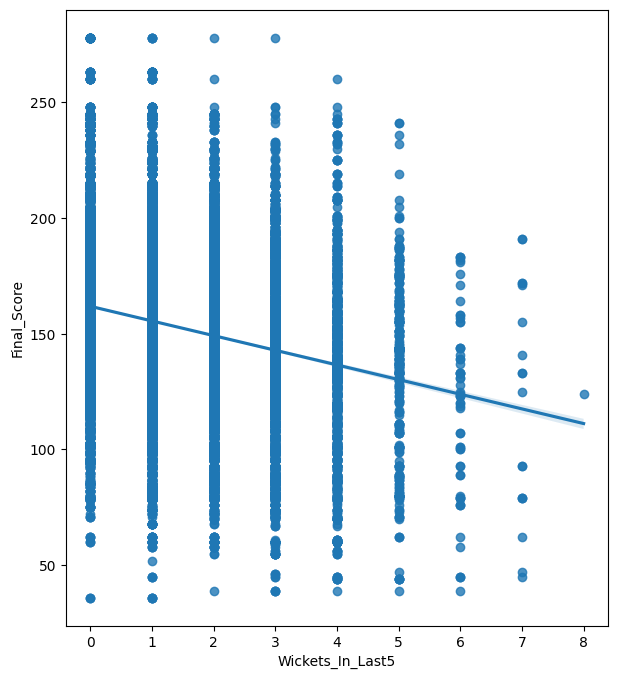

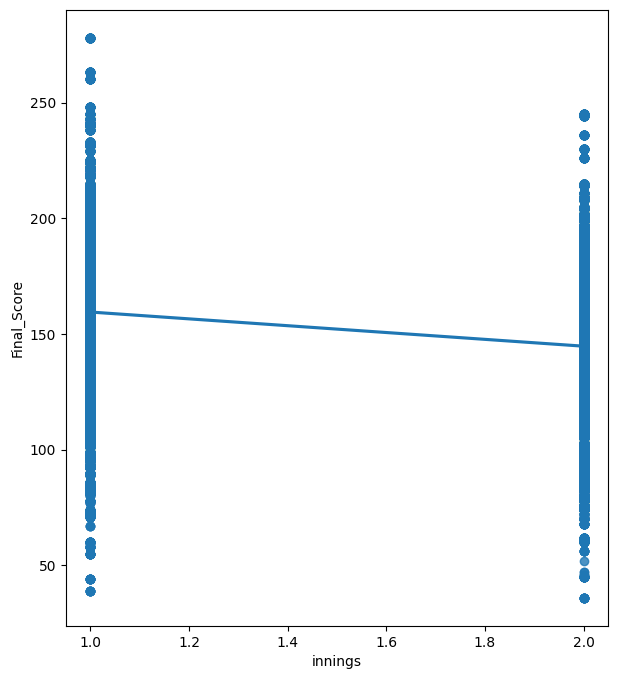

In [10]:
for i in num:
    plt.figure(figsize=(7,8))
    sns.regplot(x=df[i],y=df['Final_Score'])
    plt.show()

In [11]:
df.isna().sum()

powerPlay            440
AverageScore           0
battingTeam            0
bowlingTeam            0
city                   0
delivery_left          0
score                  0
CurrentRunRate         0
wicketsLeft            0
Run_In_Last5        4176
Wickets_In_Last5    7976
Final_Score            0
innings             1302
dtype: int64

In [12]:
df['powerPlay'].unique()

array([ 0.,  1., nan])

In [13]:
df['powerPlay']=df['powerPlay'].fillna(df['powerPlay'].mode()[0])

In [14]:
df['Run_In_Last5'].unique()

array([24., 30., 27., 50., 38., 39., 42., nan, 58., 57., 51., 28., 32.,
       52., 36., 54., 46., 65., 62., 44., 49., 41., 34., 69., 56., 29.,
       20., 35., 55., 45., 31., 25., 59., 14., 23., 61., 63., 43., 33.,
       21., 40., 48., 47., 22., 70., 74., 37., 26., 19., 68., 17., 73.,
       18., 60., 53., 66., 13., 12., 16., 81., 71., 77., 78., 64., 15.,
       79., 75., 72., 67., 86., 83.,  9., 88.,  6., 11., 82., 85., 10.,
       76., 80., 84.,  5., 87.,  8.])

In [15]:
df['Run_In_Last5']=df['Run_In_Last5'].fillna(df['Run_In_Last5'].median())

In [16]:
df['Wickets_In_Last5'].unique()

array([ 2.,  3.,  0.,  1., nan,  4.,  6.,  5.,  7.,  8.])

In [17]:
df['Wickets_In_Last5']=df['Wickets_In_Last5'].fillna(df['Wickets_In_Last5'].mode()[0])

In [18]:
df['innings'].unique()

array([ 1.,  2., nan])

In [19]:
df['innings']=df['innings'].fillna(df['innings'].mode()[0])

In [20]:
df.isna().sum()

powerPlay           0
AverageScore        0
battingTeam         0
bowlingTeam         0
city                0
delivery_left       0
score               0
CurrentRunRate      0
wicketsLeft         0
Run_In_Last5        0
Wickets_In_Last5    0
Final_Score         0
innings             0
dtype: int64

In [21]:
for i in num:
    Q1=df[i].quantile(.25)
    Q3=df[i].quantile(.75)
    IQR=Q3-Q1

    lower_bound=Q1-IQR*1.5
    upper_bound=Q3+IQR*1.5

    print(f"lower bound is {lower_bound} and upper bound is {upper_bound}")

    df_cleaned=df[(df[i]>=lower_bound) & (df[i]<=upper_bound)]

lower bound is 0.0 and upper bound is 0.0
lower bound is 104.80357142857146 and upper bound is 193.5178571428571
lower bound is -40.0 and upper bound is 136.0
lower bound is -31.0 and upper bound is 209.0
lower bound is 2.8931637519872804 and upper bound is 12.042925278219396
lower bound is 0.5 and upper bound is 12.5
lower bound is 11.5 and upper bound is 63.5
lower bound is -0.5 and upper bound is 3.5
lower bound is -0.5 and upper bound is 3.5


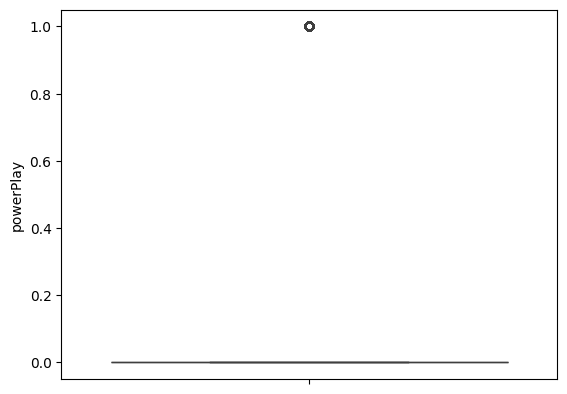

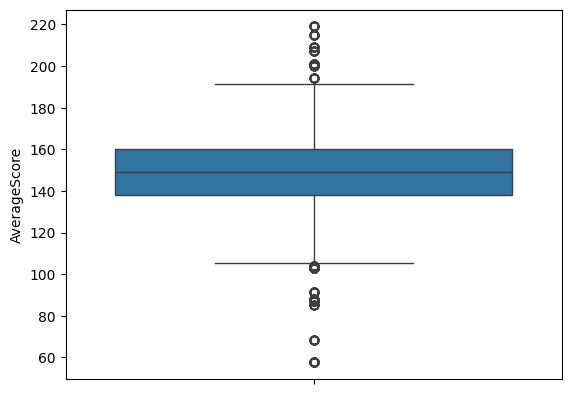

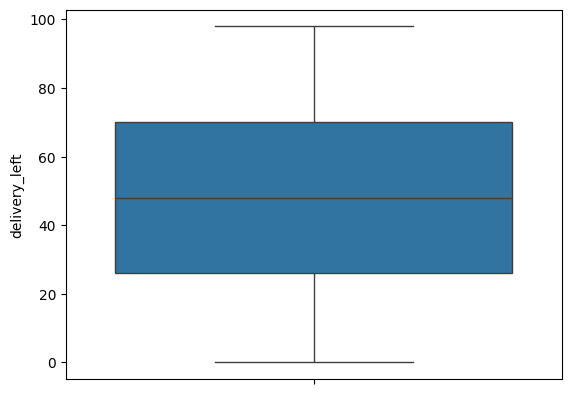

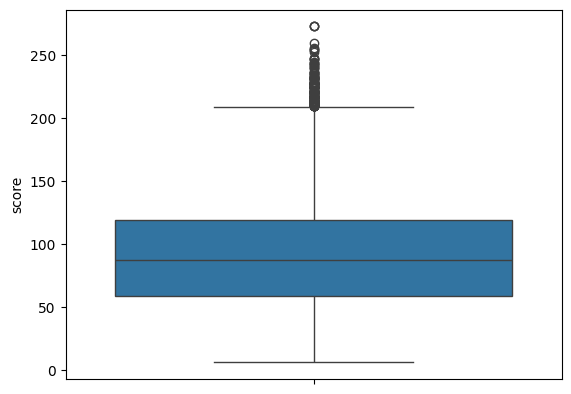

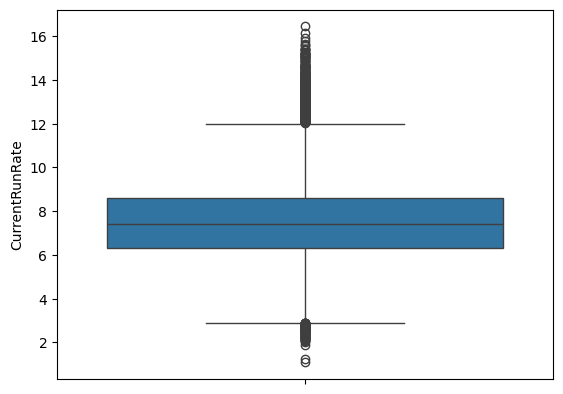

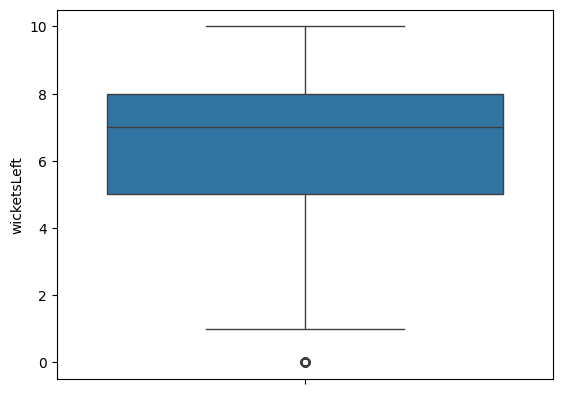

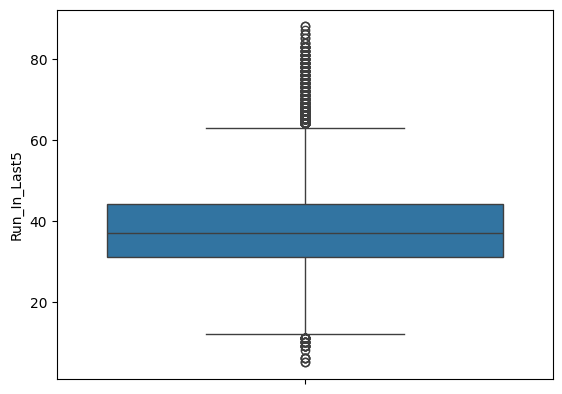

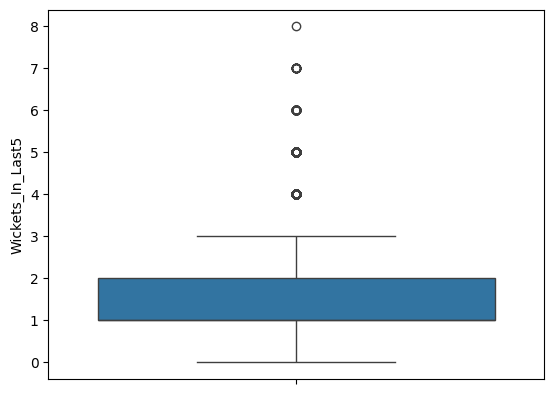

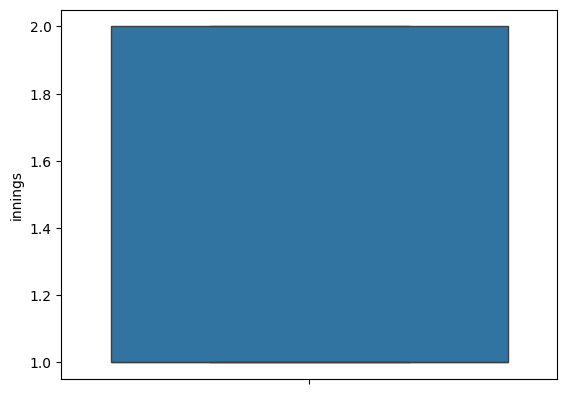

In [22]:
for i in num:
    sns.boxplot(df_cleaned[i])
    plt.show()

In [23]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df_cleaned['city']=encoder.fit_transform(df_cleaned['city'])

In [30]:
df1=pd.get_dummies(df_cleaned[['battingTeam','bowlingTeam']],dtype=int,drop_first=True)

In [31]:
df_final=pd.concat([df_cleaned,df1],axis=1)

In [32]:
df_final.head()

,powerPlay,AverageScore,battingTeam,bowlingTeam,city,delivery_left,score,CurrentRunRate,wicketsLeft,Run_In_Last5,...,bowlingTeam_England,bowlingTeam_India,bowlingTeam_Ireland,bowlingTeam_Netherlands,bowlingTeam_New Zealand,bowlingTeam_Pakistan,bowlingTeam_South Africa,bowlingTeam_Sri Lanka,bowlingTeam_West Indies,bowlingTeam_Zimbabwe
0,0.0,138.162791,New Zealand,Pakistan,36,63,56,5.894737,8,24.0,...,0,0,0,0,0,1,0,0,0,0
1,0.0,103.000000,Zimbabwe,Sri Lanka,45,40,76,5.700000,5,30.0,...,0,0,0,0,0,0,0,1,0,0
2,0.0,154.000000,West Indies,Australia,90,53,68,6.089552,5,27.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,146.285714,Australia,India,9,18,159,9.352941,7,50.0,...,0,1,0,0,0,0,0,0,0,0
4,0.0,135.609756,Sri Lanka,South Africa,27,42,82,6.307692,7,38.0,...,0,0,0,0,0,0,1,0,0,0


In [33]:
df_final.drop(['battingTeam','bowlingTeam'],axis=1,inplace=True)

In [34]:
df_final.dtypes

powerPlay                   float64
AverageScore                float64
city                          int64
delivery_left                 int64
score                         int64
CurrentRunRate              float64
wicketsLeft                   int64
Run_In_Last5                float64
Wickets_In_Last5            float64
Final_Score                   int64
innings                     float64
battingTeam_Australia         int64
battingTeam_Bangladesh        int64
battingTeam_England           int64
battingTeam_India             int64
battingTeam_Ireland           int64
battingTeam_Netherlands       int64
battingTeam_New Zealand       int64
battingTeam_Pakistan          int64
battingTeam_South Africa      int64
battingTeam_Sri Lanka         int64
battingTeam_West Indies       int64
battingTeam_Zimbabwe          int64
bowlingTeam_Australia         int64
bowlingTeam_Bangladesh        int64
bowlingTeam_England           int64
bowlingTeam_India             int64
bowlingTeam_Ireland         

In [35]:
x=df_final.drop('Final_Score',axis=1)
y=df_final['Final_Score']

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [40]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,root_mean_squared_error,r2_score

In [38]:
lr=LinearRegression()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
models=[lr,dt,rf]

In [41]:
for model in models:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f"model : {model}")
    print(y_pred)
    print("*"*15)
    print(f"MAE is {mean_absolute_error(y_test,y_pred)}")
    print(f"MApE is {mean_absolute_percentage_error(y_test,y_pred)}")
    print(f"MSE is {mean_squared_error(y_test,y_pred)}")
    print(f"RMSE is {root_mean_squared_error(y_test,y_pred)}")
    print(f"r2 score is {r2_score(y_test,y_pred)}")
    print("-"*50)

model : LinearRegression()
[150.06340847 143.48764888 174.28300333 ... 163.88539518 152.09689754
 138.08620873]
***************
MAE is 14.571204925519046
MApE is 0.10621483241523368
MSE is 374.64593045235847
RMSE is 19.355772535663835
r2 score is 0.6476255441740444
--------------------------------------------------
model : DecisionTreeRegressor()
[169. 158. 187. ... 162. 122. 139.]
***************
MAE is 5.691791666666667
MApE is 0.04055175227179403
MSE is 200.91710416666666
RMSE is 14.174523066638491
r2 score is 0.8110267602229861
--------------------------------------------------
model : RandomForestRegressor()
[154.   156.49 178.28 ... 161.93 132.43 133.17]
***************
MAE is 5.9973129583333336
MApE is 0.04340085756218844
MSE is 97.11529831164583
RMSE is 9.854709448362536
r2 score is 0.9086578883864502
--------------------------------------------------
